# [2020 신입 데이터 분석가 채용 : basic analytics test]

이 데이터는 한 가상의 온라인 쇼핑몰의 뷰티 카테고리의 1주일치 판매량 데이터입니다. 

In [1]:
# 기본 세팅

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'ticks')

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
plt.rcParams["font.family"] = 'Malgun Gothic'

버전:  3.3.2
설치 위치:  C:\Users\User\anaconda3\envs\venv\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\User\.matplotlib
캐시 위치:  C:\Users\User\.matplotlib
설정파일 위치:  C:\Users\User\anaconda3\envs\venv\lib\site-packages\matplotlib\mpl-data\matplotlibrc
455


In [2]:
import pandas as pd
df = pd.read_pickle('siteA_weekly_data_20191118_20191124.pickle')

## 데이터 설명서
- doc_id : id 
- category : 상품의 카테고리
- goods_name : 상품명
- sold_day : 판매일자
- sell_amount: 판매량
- site price : 판매 가격
- brand_name : 브랜드명
- tag : 태그 키워드
- 이하 칼럼 : 상품 상세설명에 기록된 상세 정보

In [3]:
df.iloc[0]

doc_id                          T_siteA_3542_9327326038_20191118
category                             siteA > 뷰티 > 남성화장품 > 남성BB크림
goods_name                          1+1 무칸 내츄럴 남자비비크림 외 남자화장품 모음
sold_day                                                20191118
sell_amount                                                    1
site_price                                                 23900
brand_name                                                    무칸
seller_name                                                   무칸
e-mail                                         jcc6960@gmail.com
tag                                                         번들상품
제조자/수입자        제조자/수입품의 경우 수입자를 함께 표기=상품상세설명 참조/제조업자 및 책임판매업자=무칸
제조국(원산지)                                           제조국=한국/원산지=국내
AS정보           고객문의 대표번호=070-4259-6960/A/S안내=JCC SHOP 담당자 070...
용량(중량)                                                 상품상세설명 참조
크기(무게)         1,200g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측...
대표자명                     

# 1. 가격과 판매량 비교하기
1) 가격(site_price)과 판매량(sell_amount) 사이의 관계를 표현할 수 있는 visualization을 해보세요.

2) 위 결과에서 이례적인 부분은 어떤 부분들이며 실제로 어떤 경우에 그런 상황이 발생할 수 있을지를 설명해 주세요.

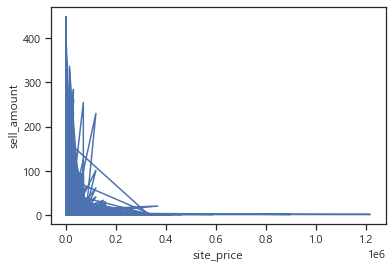

In [4]:
##[답안 코드 입력]

#1) 

x = df['site_price']
y = df['sell_amount']
plt.xlabel('site_price')
plt.ylabel('sell_amount')

plt.plot(x,y)

#2) 

# 단가가 아주 낮은데 판매량이 적거나, 단가가 아주 높은데 판매량이 많은 데이터의 경우가 있어, 가격 대비 판매량관계가 일반적인 우하향 그래프가 아닌, 튀는 경우가 발생한다고 생각 

In [5]:
df

,doc_id,category,goods_name,sold_day,sell_amount,site_price,brand_name,seller_name,e-mail,tag,...,크기(무게),대표자명,사업자번호,전화번호,주소,상품추가설명,사용방법,주의사항,품질보증,기재하여야하는 사항
7691,T_siteA_3542_9327326038_20191118,siteA > 뷰티 > 남성화장품 > 남성BB크림,1+1 무칸 내츄럴 남자비비크림 외 남자화장품 모음,20191118,1.0,23900.0,무칸,무칸,jcc6960@gmail.com,번들상품,...,"1,200g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측...",조경길,1372185816,070-4259-6960,인천광역시 서구 검암로 21 (검암동) 은하빌딩 202호,,상품상세설명 참조,,상품상세설명 참조,
7711,T_siteA_168534_7912238219_20191118,siteA > 뷰티 > 남성화장품 > 남성BB크림,[남자 올인원 CC크림] 씨씨비비/톤업/썬크림/남성옴므,20191118,1.0,35000.0,스와니코코,스와니코코,yujin@brain-group.co.kr,,...,,신규용,5158139817,1688-7893,서울특별시 강남구 테헤란로 325 (역삼동) 어반벤치 15층,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
11073,T_siteA_876784_8572704187_20191118,siteA > 뷰티 > 남성화장품 > 남성BB크림,[블랙몬스터] 비비로션,20191118,1.0,18900.0,블랙몬스터,블랭크코퍼레이션,cgh@blankcorp.kr,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",남대광,3598700301,070-4640-0693,"서울특별시 강남구 테헤란로 311 (역삼동,아남타워빌딩) 3층",인증번호: 상품상세설명참조 (해당 인증·검사정보는 판매자가 직접 등록한 것으로 등록...,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
13593,T_siteA_1129914_6644299425_20191118,siteA > 뷰티 > 남성화장품 > 남성BB크림,[이니스프리] 익스트림 파워 위장크림 SPF50+PA+++/15g,20191118,1.0,6280.0,이니스프리,피뿌짱,chorong0925@hanmail.net,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",박미선,1091327567,010-3804-9124,서울특별시 강서구 곰달래로 115 (화곡동) 1층,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
14655,T_siteA_317996_4673067472_20191118,siteA > 뷰티 > 남성화장품 > 남성BB크림,꽃남 에너지팩토리 스킨핏 맨즈밤 (신형),20191118,7.0,9150.0,꽃을든남자,화장품89,cosmeticmj@gmail.com,,...,,구경희,5032553519,010-9361-9536,대구광역시 달서구 명덕로2길 29 (두류동) 1층 4호,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77347,T_siteA_58700_9244191691_20191124,siteA > 뷰티 > 헤어케어 > 헤어팩,에트투스 아르간/바오밥 헤어팩 1000g/트리트먼트,20191124,3.0,11700.0,메디플라워,메디플라워,mediflower11@hanmail.net,번들상품,...,,권병삼,1178176597,02-6497-2772,서울특별시 양천구 목동중앙북로 60 (목동) 신화타워아파트 비02호,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
77348,T_siteA_58700_9244191693_20191124,siteA > 뷰티 > 헤어케어 > 헤어팩,에트투스 아르간/바오밥 헤어팩 1000g/트리트먼트,20191124,1.0,11700.0,메디플라워,메디플라워,mediflower11@hanmail.net,번들상품,...,,권병삼,1178176597,02-6497-2772,서울특별시 양천구 목동중앙북로 60 (목동) 신화타워아파트 비02호,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
77349,T_siteA_58700_9244191695_20191124,siteA > 뷰티 > 헤어케어 > 헤어팩,에트투스 아르간/바오밥 헤어팩 1000g/트리트먼트,20191124,1.0,11700.0,메디플라워,메디플라워,mediflower11@hanmail.net,번들상품,...,,권병삼,1178176597,02-6497-2772,서울특별시 양천구 목동중앙북로 60 (목동) 신화타워아파트 비02호,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
72546,T_siteA_141208_3683823193_20191124,siteA > 뷰티 > 헤어케어 > 헤어팩,오로라 원적외선 전기모자 홈케어 헤어캡 트리트먼트,20191124,3.0,16800.0,헤어트리트먼트캡,미용인몰,ghdgusrl1989@nate.com,,...,"500g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",오영한,2728800753,02-2203-4501,"서울특별시 송파구 송이로 150 (가락동,재경빌딩) 지하1층",,,,관련법 및 소비자 분쟁해결 규정에 따름,


# 2. 브랜드별 상품 분석하기
주어진 데이터 안에서 가장 판매상품(goods_name)이 많은 브랜드 상위 5개를 나열해주세요. (브랜드명이 비어있거나, 상품상세설명 참조 등의 알 수 없는 브랜드는 제외)


In [6]:
ex2 = df.groupby('brand_name')['goods_name'].count().nlargest()
ex2

brand_name
              7451
상품상세설명 참조     3277
릴리바이레드        1949
클리오           1489
passioncat    1004
Name: goods_name, dtype: int64

In [7]:
##[답안 코드 입력]

df_brand_top5 = df.groupby('brand_name')['goods_name'].count().nlargest(7)
df_brand_top5  # 알수없는 브랜드 가 1,2등을 차지하므로 3등부터 나열


df_brand_top5[2:]  # 결과 : 릴리바이레드, 클리오, passioncat, 에스티로더, 헤라 

brand_name
릴리바이레드        1949
클리오           1489
passioncat    1004
에스티로더          978
헤라             921
Name: goods_name, dtype: int64

# 3. 셀러 분석하기
1.여러 상품을, 동일 판매자의 상품으로 추정할 수 있는 feature(column)를 리스트업해주세요. 
 
2.위 feature 중 가장 신뢰할 수 있는 feature(column)는 무엇인지, 선정 근거는 무엇인지 적어주세요.
•	특정 판매자를 사례로 들어 설명하셔도 됩니다. 

#### 3-1 답안.
goods_name을 기준으로 seller_name

In [8]:
df.columns

Index(['doc_id', 'category', 'goods_name', 'sold_day', 'sell_amount',
       'site_price', 'brand_name', 'seller_name', 'e-mail', 'tag', '제조자/수입자',
       '제조국(원산지)', 'AS정보', '용량(중량)', '크기(무게)', '대표자명', '사업자번호', '전화번호', '주소',
       '상품추가설명', '사용방법', '주의사항', '품질보증', '기재하여야하는 사항'],
      dtype='object')

#### 3-2 답안 코드입력.

In [9]:
##[답안 코드 입력]

c = df.columns
ex1=df.groupby(['e-mail','seller_name','goods_name']).sum()
ex1  # 직접적인 판매자 이름 컬럼인 seller_name말고는 솔직히 잘 모르겠습니다.. 

sell_amount  \
e-mail             seller_name goods_name                                                
                   VIVIAN      아르베라 Arvera 리페어 랩 패키지(세럼 부스터)                       4.0   
                   candys      AHC 에센셜 내추럴 마스크팩 25매 모이스처/너리싱/화이트닝/리바이탈라이징          2.0   
                               [데싱디바] 슈퍼슬림핏 스와로브스키 크리스탈 컬렉션 1종 선택                  3.0   
                               [지오마] 탈라쏘 바디스크럽 600ml 이몰리언트                         4.0   
                   clionelash1 [3+1 5+2 7+3] 속눈썹연장 속눈썹연장재료 실크/밍크                   5.0   
...                                                                                ...   
zziongod@naver.com 유니크팩토리      [메디큐브] 메디큐브 레드 이레이징 크림 100ml                       46.0   
                               [메디큐브] 메디큐브 레드 이레이징 크림 50g                          2.0   
                               [메디큐브] 메디큐브 레드 크림 플러스 100ml 대용량                     7.0   
                               [메디큐브] 메디큐브 레드 폼 클렌저 230ml                          5.0   
                               메디큐브 레드 토너 플러스 200ml                               13.0   

                                                                           site_price  
e-mail             seller_name goods_name                                              
                   VIVIAN      아르베라 Arvera 리페어 랩 패키지(세럼 부스터)                  83000.0  
                   candys      AHC 에센셜 내추럴 마스크팩 25매 모이스처/너리싱/화이트닝/리바이탈라이징     44000.0  
                               [데싱디바] 슈퍼슬림핏 스와로브스키 크리스탈 컬렉션 1종 선택             29400.0  
                               [지오마] 탈라쏘 바디스크럽 600ml 이몰리언트                    78400.0  
                   clionelash1 [3+1 5+2 7+3] 속눈썹연장 속눈썹연장재료 실크/밍크              24000.0  
...                                                                               ...  
zziongod@naver.com 유니크팩토리      [메디큐브] 메디큐브 레드 이레이징 크림 100ml                  214990.0  
                               [메디큐브] 메디큐브 레드 이레이징 크림 50g                     43480.0  
                               [메디큐브] 메디큐브 레드 크림 플러스 100ml 대용량               191000.0  
                               [메디큐브] 메디큐브 레드 폼 클렌저 230ml                     26950.0  
                               메디큐브 레드 토너 플러스 200ml                          200640.0  

[13487 rows x 2 columns]

In [10]:
df[df['seller_name'].str.contains('유니크팩토리')] # 유니크팩토리가 메디큐브제품 여러개를 판매하고 있음.. 

,doc_id,category,goods_name,sold_day,sell_amount,site_price,brand_name,seller_name,e-mail,tag,...,크기(무게),대표자명,사업자번호,전화번호,주소,상품추가설명,사용방법,주의사항,품질보증,기재하여야하는 사항
1427,T_siteA_603131_9561661420_20191118,siteA > 뷰티 > 스킨케어 > 스킨/토너,메디큐브 레드 토너 플러스 200ml,20191118,4.0,33440.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요.,상품상세설명 참조,
10107,T_siteA_620745_9583421353_20191118,siteA > 뷰티 > 스킨케어 > 에센스/세럼,[메디큐브] 메디큐브 레드 세럼 플러스 50ml 대용량,20191118,5.0,35500.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
10524,T_siteA_616729_9582742957_20191118,siteA > 뷰티 > 스킨케어 > 탄력크림,[메디큐브] 메디큐브 레드 크림 플러스 100ml 대용량,20191118,3.0,48000.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
8009,T_siteA_65555_9401838609_20191118,siteA > 뷰티 > 스킨케어 > 화이트닝크림,[메디큐브] 메디큐브 레드 이레이징 크림 100ml,20191118,8.0,32980.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
16062,T_siteA_603131_9561661420_20191119,siteA > 뷰티 > 스킨케어 > 스킨/토너,메디큐브 레드 토너 플러스 200ml,20191119,1.0,33440.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요.,상품상세설명 참조,
23359,T_siteA_620745_9583421353_20191119,siteA > 뷰티 > 스킨케어 > 에센스/세럼,[메디큐브] 메디큐브 레드 세럼 플러스 50ml 대용량,20191119,3.0,35500.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
22209,T_siteA_1239605_9485721509_20191119,siteA > 뷰티 > 스킨케어 > 에센스/세럼,[메디큐브] 메디큐브 레드 이레이징 스팟 세럼 본품 5ml+리필 5ml,20191119,1.0,24500.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
21506,T_siteA_65555_9401838609_20191119,siteA > 뷰티 > 스킨케어 > 화이트닝크림,[메디큐브] 메디큐브 레드 이레이징 크림 100ml,20191119,5.0,32980.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
28276,T_siteA_603131_9561661420_20191120,siteA > 뷰티 > 스킨케어 > 스킨/토너,메디큐브 레드 토너 플러스 200ml,20191120,4.0,33440.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요.,상품상세설명 참조,
35467,T_siteA_620745_9583421353_20191120,siteA > 뷰티 > 스킨케어 > 에센스/세럼,[메디큐브] 메디큐브 레드 세럼 플러스 50ml 대용량,20191120,3.0,35500.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,


In [11]:
df[df['goods_name'].str.contains('메디큐브')] 

,doc_id,category,goods_name,sold_day,sell_amount,site_price,brand_name,seller_name,e-mail,tag,...,크기(무게),대표자명,사업자번호,전화번호,주소,상품추가설명,사용방법,주의사항,품질보증,기재하여야하는 사항
1186,T_siteA_1190066_9526847753_20191118,siteA > 뷰티 > 스킨케어 > 스킨/토너,[메디큐브] (무료배송) 메디큐브 제로 모공 패드 70매,20191118,1.0,30000.0,메디큐브,beauty_star9,hnb101@naver.com,,...,,이미란,1571500047,070-7795-2096,서울특별시 마포구 잔다리로 109 (서교동) 만도빌딩 3층,,,상세페이지참조,상세페이지참조,
1427,T_siteA_603131_9561661420_20191118,siteA > 뷰티 > 스킨케어 > 스킨/토너,메디큐브 레드 토너 플러스 200ml,20191118,4.0,33440.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요.,상품상세설명 참조,
2815,T_siteA_956235_9657236987_20191118,siteA > 뷰티 > 스킨케어 > 에센스/세럼,[메디큐브] 레드 이레이징 스팟세럼 5ml+5ml,20191118,2.0,19000.0,,밀리언즈9911,tosill09@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",최길혜,5817300177,010-3314-8222,"인천광역시 남구 용오로 82 (용현동,동아아파트) 4동 305호",,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
10107,T_siteA_620745_9583421353_20191118,siteA > 뷰티 > 스킨케어 > 에센스/세럼,[메디큐브] 메디큐브 레드 세럼 플러스 50ml 대용량,20191118,5.0,35500.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
10524,T_siteA_616729_9582742957_20191118,siteA > 뷰티 > 스킨케어 > 탄력크림,[메디큐브] 메디큐브 레드 크림 플러스 100ml 대용량,20191118,3.0,48000.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
12665,T_siteA_132877_8600660306_20191118,siteA > 뷰티 > 스킨케어 > 탄력크림,메디큐브 레드 이레이징 크림 50ml/100ml,20191118,2.0,28000.0,메디큐브,오즈비엔에이치,oz@ozbh.co.kr,번들상품,...,"100g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",한형구,7698700056,010-5628-9771,"경기도 하남시 조정대로 45 (풍산동,미사센텀비즈) 9동 939층",,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
8009,T_siteA_65555_9401838609_20191118,siteA > 뷰티 > 스킨케어 > 화이트닝크림,[메디큐브] 메디큐브 레드 이레이징 크림 100ml,20191118,8.0,32980.0,메디큐브,유니크팩토리,zziongod@naver.com,,...,"300g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",허경만,1574700257,010-2889-7364,경기도 이천시 창전동 애련정로128-1 1동 403호,,상품상세설명 참조,피부에 이상반응시 사용을 중지해 주세요,소비자 품질기준 따름,
7333,T_siteA_1085538_9730732082_20191118,siteA > 뷰티 > 스킨케어 > 화이트닝크림,메디큐브 레드 멜라이징 크림 50ml 1개,20191118,4.0,15900.0,메디큐브,써니플레이스,snpick01@sunnypick.me,,...,,박희선,2698800679,1544-3558,"서울특별시 강남구 선릉로76길 20 (대치동,유영빌딩) 2층",,본품 적당량을 취해 피부에 골고루 펴 바른다.,,본 제품에 이상이 있을 경우 공정거래위원회 고시 소비자분쟁해결기준에 의거 보상,
14470,T_siteA_63993_9804443904_20191118,siteA > 뷰티 > 클렌징/필링 > 클렌징티슈,메디큐브 제로 모공 패드 70매,20191118,24.0,22000.0,,트러스트퍼스트,,,...,"500g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측정 ...",,,010-6353-8766,,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,
12547,T_siteA_7886_9138082335_20191118,siteA > 뷰티 > 클렌징/필링 > 클렌징폼,메디큐브 레드 폼 클렌저 230ml,20191118,1.0,29600.0,,골든트리몰,sdm08144@naver.com,,...,,신동민,7670800453,010-4727-2391,서울특별시 강서구 화곡동 화곡로35길 23-17 서림골드아파트 5층 502호,,상품상세설명 참조,상품상세설명 참조,상품상세설명 참조,


# 4. 카테고리 분석하기
1. 카테고리의 3번째 뎁스*의 카테고리의 일자별 판매량(sell_amount) 등락을 확인하는 그래프를 그려보시오.
*예: ‘siteA > 뷰티 > 남성화장품 > 남성에센스’의 3번째 뎁스는 ‘남성 화장품’ 입니다.



<AxesSubplot:xlabel='sold_day', ylabel='sell_amount'>

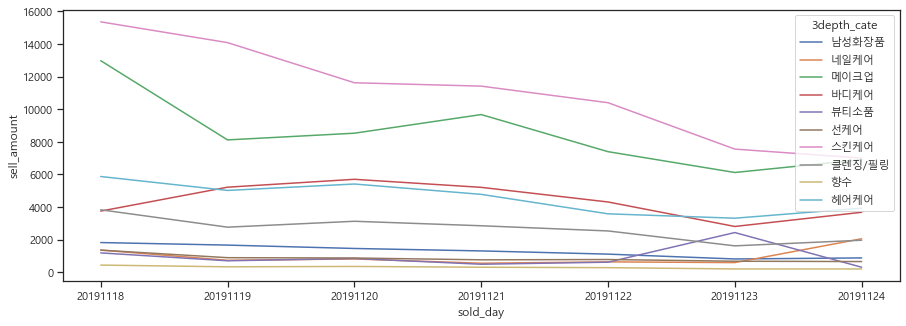

In [12]:
## [답안 코드 입력]
# 4-1. 
df['3depth_cate'] = [i.split(' > ')[2] for i in df['category']]  # df에 df.category의 3번째 뎁스 문자열에 대한 칼럼을 추가
grp1 = df.groupby(['sold_day','3depth_cate']).sum()

plt.figure(figsize=(15,5))
sns.lineplot(data = grp1, x='sold_day', y = 'sell_amount', hue = '3depth_cate')

In [13]:
grp1

sell_amount  site_price
sold_day 3depth_cate                         
20191118 남성화장품             1822.0  14407740.0
         네일케어              1360.0   3282550.0
         메이크업             12980.0  97787560.0
         바디케어              3752.0  16815970.0
         뷰티소품              1188.0   6751340.0
...                           ...         ...
20191124 선케어                656.0   6158330.0
         스킨케어              7004.0  58330670.0
         클렌징/필링            1966.0   9907630.0
         향수                 203.0   5616530.0
         헤어케어              3933.0  18516400.0

[70 rows x 2 columns]


2. 다음 데이터의 상품은 메이크업, 스킨케어, 헤어케어, 바디케어, 클렌징/필링, 네일케어, 남성화장품, 뷰티소품,선케, 향수 카테고리에 모두 속해 있습니다.

이 사실을 이용하여 아래 테이블을 작성해주세요.


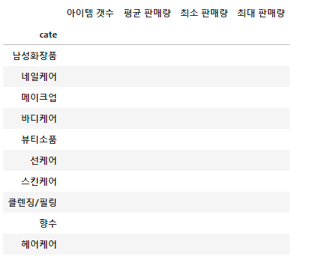

In [14]:
## [답안 코드 입력]
# 4-2. 

df.groupby('3depth_cate').describe()['sell_amount']

,count,mean,std,min,25%,50%,75%,max
3depth_cate,,,,,,,,
남성화장품,2846.0,3.184469,7.569575,1.0,1.0,1.0,3.0,196.0
네일케어,3141.0,2.148360,3.863551,1.0,1.0,1.0,2.0,62.0
메이크업,24557.0,2.432423,5.559820,1.0,1.0,1.0,2.0,337.0
바디케어,7531.0,4.074227,10.977083,1.0,1.0,2.0,4.0,365.0
뷰티소품,2121.0,3.106554,4.665405,1.0,1.0,1.0,3.0,83.0
선케어,1946.0,3.084789,4.984965,1.0,1.0,2.0,3.0,84.0
스킨케어,17759.0,4.361732,13.341968,1.0,1.0,1.0,3.0,449.0
클렌징/필링,5058.0,3.696916,8.564870,1.0,1.0,2.0,3.0,152.0
향수,1259.0,1.689436,1.617071,1.0,1.0,1.0,2.0,16.0
